In [1]:
import numpy as np
import argparse
import cv2
from matplotlib import pyplot as plt

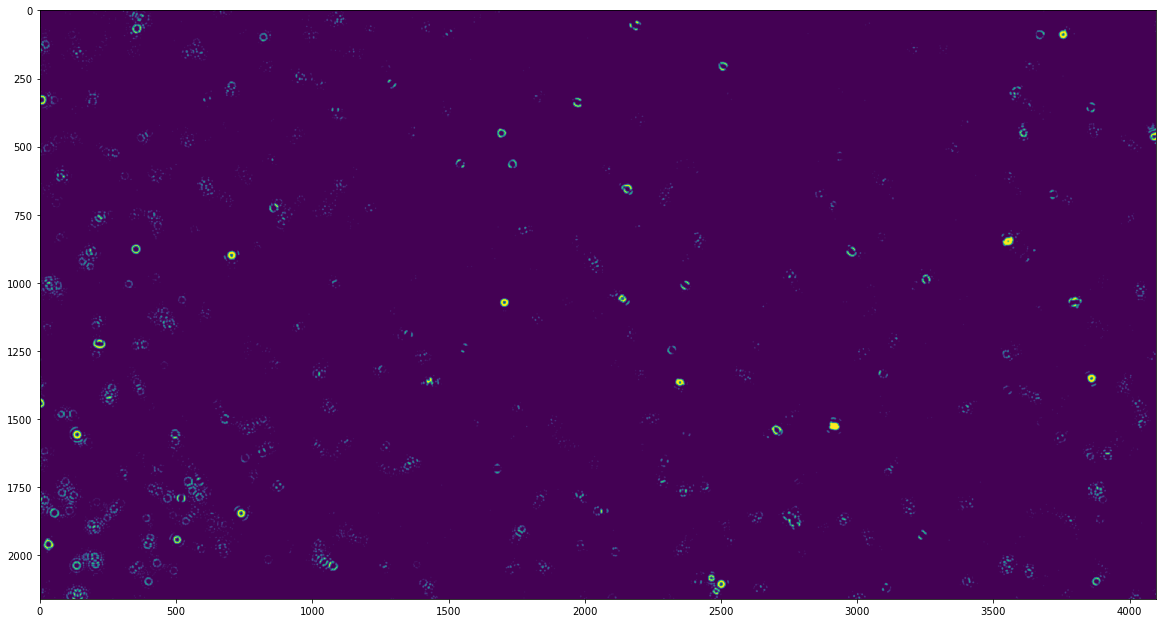

In [14]:

img = cv2.imread("THp002.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


ret, mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
image_gray = cv2.GaussianBlur(mask_inv, (11,11), 0)
kernel1 = np.ones((3,3),np.uint8) 
image_edged = cv2.dilate(image_gray, kernel1, iterations=1)
image_edged = cv2.erode(image_edged, kernel1, iterations=1)

closing = cv2.morphologyEx(image_edged , cv2.MORPH_CLOSE, kernel1)

figure = plt.subplots(figsize = (20,20))
plt.imshow(closing)


In [10]:
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(closing,  
                  # cv2.HOUGH_GRADIENT, 1.2, 20, param1 = 30, 
              # param2 = 30, minRadius = 10, maxRadius = 30)
                     cv2.HOUGH_GRADIENT, 1, 40, param1 = 30, 
               param2 = 30, minRadius = 10, maxRadius =30)
   
# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
    print(len(detected_circles[0, :]) )
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2]
        crop(img, (a-30,b-30,a+30,b+30),str(pt)+'crop.jpg')
        # Draw the circumference of the circle. 
        #cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
        # Draw a small circle (of radius 1) to show the center. 
        #cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
        #cv2.imshow("Detected Circle", img) 
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()

469


In [9]:
from PIL import Image

def crop(image_path, coords, saved_location):
    image_obj = Image.open("THw002.png")
    cropped_image = image_obj.crop(coords)
    cropped_image.save(saved_location)
    #cropped_image.show()
    